In [2]:
#Importing the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [6]:
#read the data
df = pd.read_csv('dataset play.csv')

In [8]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


## Bank data
* predict whether the customer will go for depositing the money plan
* 11162 customer,

In [11]:
df.shape

(11162, 17)

## Exploratory Data Analysis

In [14]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [16]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


<Axes: ylabel='age'>

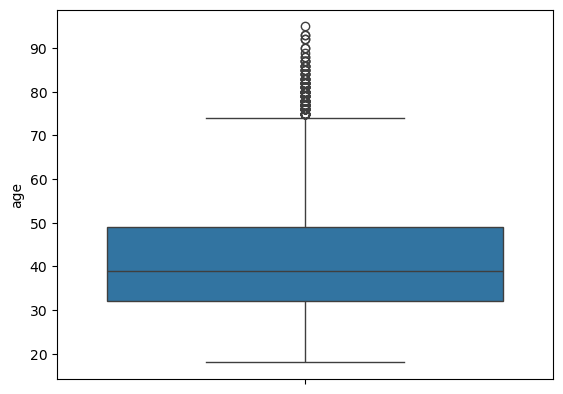

In [18]:
sns.boxplot(df['age'])

C:\Users\nikhi\AppData\Local\Temp\ipykernel_6096\4063624855.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'], bins= 50)


<Axes: xlabel='age', ylabel='Density'>

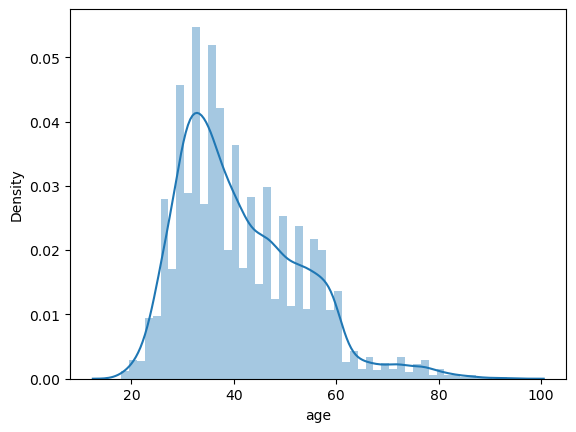

In [20]:
sns.distplot(df['age'], bins= 50)

<Axes: >

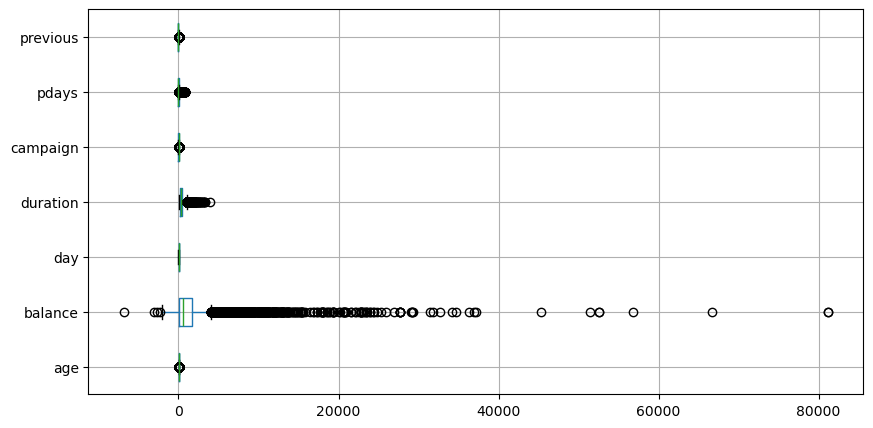

In [22]:
plt.figure(figsize = (10,5))
df.boxplot(vert = False)

<Axes: ylabel='duration'>

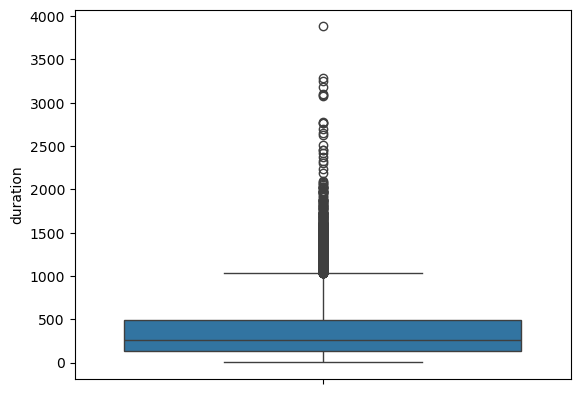

In [24]:
sns.boxplot(df['duration'])

C:\Users\nikhi\AppData\Local\Temp\ipykernel_6096\72210790.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['duration'], bins = 100)


<Axes: xlabel='duration', ylabel='Density'>

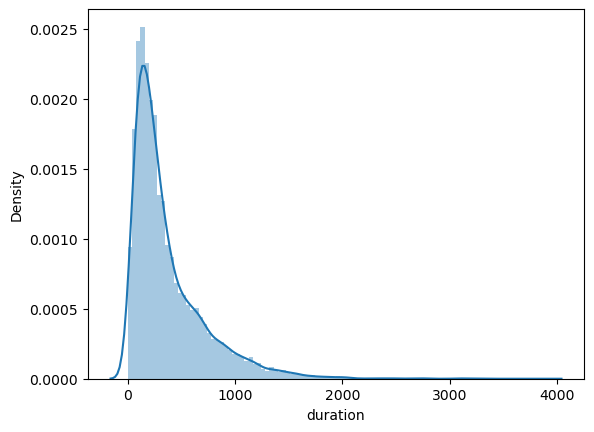

In [26]:
sns.distplot(df['duration'], bins = 100)

In [28]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [30]:
df['job'].unique()

array(['admin.', 'technician', 'services', 'management', 'retired',
       'blue-collar', 'unemployed', 'entrepreneur', 'housemaid',
       'unknown', 'self-employed', 'student'], dtype=object)

In [32]:
df['job'].value_counts()

job
management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: count, dtype: int64

In [34]:
#converting job values into criteria
df['job'] = df['job'].replace(['management', 'admin.'], 'white-collar')
df['job'] = df['job'].replace(['services', 'housemaid'], 'Pink-collar')
df['job'] = df['job'].replace(['retired', 'student', 'unemployed', 'unknown'], 'Other')

In [36]:
df['job'].value_counts()

job
white-collar     3900
blue-collar      1944
technician       1823
Other            1565
Pink-collar      1197
self-employed     405
entrepreneur      328
Name: count, dtype: int64

In [41]:
#we have contacted the customers
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,white-collar,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,white-collar,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,Pink-collar,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,white-collar,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [43]:
df['poutcome'].value_counts()

poutcome
unknown    8326
failure    1228
success    1071
other       537
Name: count, dtype: int64

In [47]:
df['poutcome'] = df['poutcome'].replace(['other'], 'unknown')

In [49]:
df['poutcome'].value_counts()

poutcome
unknown    8863
failure    1228
success    1071
Name: count, dtype: int64

In [51]:
df['contact'].value_counts()

contact
cellular     8042
unknown      2346
telephone     774
Name: count, dtype: int64

In [53]:
df.drop('contact', axis = 1, inplace = True)

In [55]:
df.head()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,white-collar,married,secondary,no,2343,yes,no,5,may,1042,1,-1,0,unknown,yes
1,56,white-collar,married,secondary,no,45,no,no,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,5,may,1389,1,-1,0,unknown,yes
3,55,Pink-collar,married,secondary,no,2476,yes,no,5,may,579,1,-1,0,unknown,yes
4,54,white-collar,married,tertiary,no,184,no,no,5,may,673,2,-1,0,unknown,yes


In [57]:
df.default.value_counts()

default
no     10994
yes      168
Name: count, dtype: int64

In [ ]:
#encoding

In [59]:
df['housing'].value_counts

<bound method IndexOpsMixin.value_counts of 0        yes
1         no
2        yes
3        yes
4         no
        ... 
11157    yes
11158     no
11159     no
11160     no
11161     no
Name: housing, Length: 11162, dtype: object>

In [61]:
df.loan.value_counts()

loan
no     9702
yes    1460
Name: count, dtype: int64

In [63]:
df['default'] = df['default'].map( {'yes' : 1, 'no' : 0})
df['housing'] = df['housing'].map( {'yes' : 1, 'no' : 0})
df['loan'] = df['loan'].map( {'yes' : 1, 'no' : 0})

In [65]:
df.head()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,white-collar,married,secondary,0,2343,1,0,5,may,1042,1,-1,0,unknown,yes
1,56,white-collar,married,secondary,0,45,0,0,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,0,1270,1,0,5,may,1389,1,-1,0,unknown,yes
3,55,Pink-collar,married,secondary,0,2476,1,0,5,may,579,1,-1,0,unknown,yes
4,54,white-collar,married,tertiary,0,184,0,0,5,may,673,2,-1,0,unknown,yes


In [69]:
df.drop(['month', 'day'], axis = 1, inplace = True)

In [71]:
df.head()

,age,job,marital,education,default,balance,housing,loan,duration,campaign,pdays,previous,poutcome,deposit
0,59,white-collar,married,secondary,0,2343,1,0,1042,1,-1,0,unknown,yes
1,56,white-collar,married,secondary,0,45,0,0,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,0,1270,1,0,1389,1,-1,0,unknown,yes
3,55,Pink-collar,married,secondary,0,2476,1,0,579,1,-1,0,unknown,yes
4,54,white-collar,married,tertiary,0,184,0,0,673,2,-1,0,unknown,yes


In [73]:
df['deposit'].value_counts()

deposit
no     5873
yes    5289
Name: count, dtype: int64

In [75]:
df['deposit'] = df['deposit'].map({'yes' : 1, 'no': 0})

In [77]:
df.head()

,age,job,marital,education,default,balance,housing,loan,duration,campaign,pdays,previous,poutcome,deposit
0,59,white-collar,married,secondary,0,2343,1,0,1042,1,-1,0,unknown,1
1,56,white-collar,married,secondary,0,45,0,0,1467,1,-1,0,unknown,1
2,41,technician,married,secondary,0,1270,1,0,1389,1,-1,0,unknown,1
3,55,Pink-collar,married,secondary,0,2476,1,0,579,1,-1,0,unknown,1
4,54,white-collar,married,tertiary,0,184,0,0,673,2,-1,0,unknown,1


In [ ]:
#pdays = number of days passed by after the client was last contacted from a previous camapign
#-1 means client was not previously contacted

In [79]:
df['pdays'].value_counts()

pdays
-1      8324
 92      106
 182      89
 91       84
 181      81
        ... 
 437       1
 728       1
 518       1
 828       1
 118       1
Name: count, Length: 472, dtype: int64

In [81]:
print('Customers that have not been contacted before :', len(df[df.pdays == -1]) )
print('Maximum values on pdays  :', df['pdays'].max())

Customers that have not been contacted before : 8324
Maximum values on pdays  : 854


In [83]:
#map pdays = -1, into a large value(10000 is used) to indicate that it is so fat in the past that it has no effect

df.loc[df['pdays'] == -1, 'pdays'] = 10000

In [85]:
df['pdays'].value_counts()

pdays
10000    8324
92        106
182        89
91         84
181        81
         ... 
437         1
728         1
518         1
828         1
118         1
Name: count, Length: 472, dtype: int64

In [87]:
#creat a new column: recent_pdays
df['recent_pdays'] = np.where(df['pdays'], 1/df.pdays, 1/df.pdays)

In [89]:
#drop the pdays
df.drop('pdays', axis =1, inplace = True)

In [91]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,duration,campaign,previous,poutcome,deposit,recent_pdays
11157,33,blue-collar,single,primary,0,1,1,0,257,1,0,unknown,0,0.000100
11158,39,Pink-collar,married,secondary,0,733,0,0,83,4,0,unknown,0,0.000100
11159,32,technician,single,secondary,0,29,0,0,156,2,0,unknown,0,0.000100
11160,43,technician,married,secondary,0,0,0,1,9,2,5,failure,0,0.005814
11161,34,technician,married,secondary,0,0,0,0,628,1,0,unknown,0,0.000100


In [93]:
#convert categorical variables into dummies

df_with_dummies = pd.get_dummies(data= df, columns =['job', 'marital', 'education','poutcome' ],
                                prefix = ['job', 'marital', 'education', 'poutcome'])

df_with_dummies.head()

,age,default,balance,housing,loan,duration,campaign,previous,deposit,recent_pdays,...,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,poutcome_failure,poutcome_success,poutcome_unknown
0,59,0,2343,1,0,1042,1,0,1,0.0001,...,False,True,False,False,True,False,False,False,False,True
1,56,0,45,0,0,1467,1,0,1,0.0001,...,False,True,False,False,True,False,False,False,False,True
2,41,0,1270,1,0,1389,1,0,1,0.0001,...,False,True,False,False,True,False,False,False,False,True
3,55,0,2476,1,0,579,1,0,1,0.0001,...,False,True,False,False,True,False,False,False,False,True
4,54,0,184,0,0,673,2,0,1,0.0001,...,False,True,False,False,False,True,False,False,False,True


In [95]:
df_with_dummies.shape

(11162, 27)

In [97]:
df_with_dummies.describe()

,age,default,balance,housing,loan,duration,campaign,previous,deposit,recent_pdays
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,0.015051,1528.538524,0.473123,0.130801,371.993818,2.508421,0.832557,0.473840,0.003124
std,11.913369,0.121761,3225.413326,0.499299,0.337198,347.128386,2.722077,2.292007,0.499338,0.030686
min,18.000000,0.000000,-6847.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000100
25%,32.000000,0.000000,122.000000,0.000000,0.000000,138.000000,1.000000,0.000000,0.000000,0.000100
50%,39.000000,0.000000,550.000000,0.000000,0.000000,255.000000,2.000000,0.000000,0.000000,0.000100
75%,49.000000,0.000000,1708.000000,1.000000,0.000000,496.000000,3.000000,1.000000,1.000000,0.001919
max,95.000000,1.000000,81204.000000,1.000000,1.000000,3881.000000,63.000000,58.000000,1.000000,1.000000


In [ ]:
#scatterplot showing age and balance

df_with_dummies.plot(kind = 'scatter', x= 'age', y ='balance')

#across all ages, majority of people have savings of less than 20000

<Axes: ylabel='Frequency'>

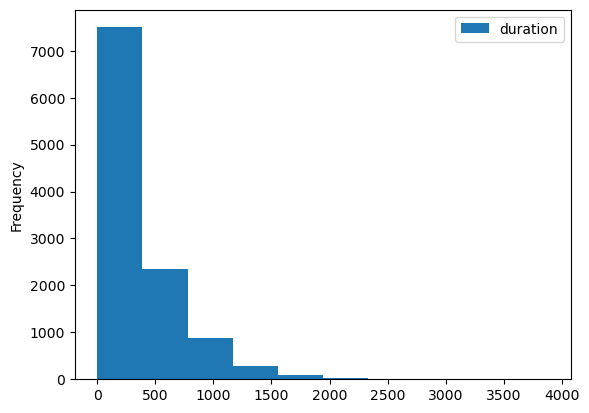

In [99]:
df_with_dummies.plot(kind = 'hist', x ='poutcome_success', y = 'duration')

* ## analysis on people who sign up for a term deposite

In [101]:
df.head()

,age,job,marital,education,default,balance,housing,loan,duration,campaign,previous,poutcome,deposit,recent_pdays
0,59,white-collar,married,secondary,0,2343,1,0,1042,1,0,unknown,1,0.0001
1,56,white-collar,married,secondary,0,45,0,0,1467,1,0,unknown,1,0.0001
2,41,technician,married,secondary,0,1270,1,0,1389,1,0,unknown,1,0.0001
3,55,Pink-collar,married,secondary,0,2476,1,0,579,1,0,unknown,1,0.0001
4,54,white-collar,married,tertiary,0,184,0,0,673,2,0,unknown,1,0.0001


In [105]:
df_with_dummies[df.deposit == 1].describe()

,age,default,balance,housing,loan,duration,campaign,previous,deposit,recent_pdays
count,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.0,5289.000000
mean,41.670070,0.009832,1804.267915,0.365854,0.091511,537.294574,2.141047,1.170354,1.0,0.004238
std,13.497781,0.098676,3501.104777,0.481714,0.288361,392.525262,1.921826,2.553272,0.0,0.035686
min,18.000000,0.000000,-3058.000000,0.000000,0.000000,8.000000,1.000000,0.000000,1.0,0.000100
25%,31.000000,0.000000,210.000000,0.000000,0.000000,244.000000,1.000000,0.000000,1.0,0.000100
50%,38.000000,0.000000,733.000000,0.000000,0.000000,426.000000,2.000000,0.000000,1.0,0.000100
75%,50.000000,0.000000,2159.000000,1.000000,0.000000,725.000000,3.000000,1.000000,1.0,0.005128
max,95.000000,1.000000,81204.000000,1.000000,1.000000,3881.000000,32.000000,58.000000,1.0,1.000000


In [107]:
df.head()

,age,job,marital,education,default,balance,housing,loan,duration,campaign,previous,poutcome,deposit,recent_pdays
0,59,white-collar,married,secondary,0,2343,1,0,1042,1,0,unknown,1,0.0001
1,56,white-collar,married,secondary,0,45,0,0,1467,1,0,unknown,1,0.0001
2,41,technician,married,secondary,0,1270,1,0,1389,1,0,unknown,1,0.0001
3,55,Pink-collar,married,secondary,0,2476,1,0,579,1,0,unknown,1,0.0001
4,54,white-collar,married,tertiary,0,184,0,0,673,2,0,unknown,1,0.0001


In [109]:
#people who signed up to a term deposite having a personal loan(loan_) and housing loan (housing_)


len(df_with_dummies[(df_with_dummies.deposit == 1) & (df_with_dummies.loan) & (df_with_dummies.housing)])

265

In [111]:
df.head()

,age,job,marital,education,default,balance,housing,loan,duration,campaign,previous,poutcome,deposit,recent_pdays
0,59,white-collar,married,secondary,0,2343,1,0,1042,1,0,unknown,1,0.0001
1,56,white-collar,married,secondary,0,45,0,0,1467,1,0,unknown,1,0.0001
2,41,technician,married,secondary,0,1270,1,0,1389,1,0,unknown,1,0.0001
3,55,Pink-collar,married,secondary,0,2476,1,0,579,1,0,unknown,1,0.0001
4,54,white-collar,married,tertiary,0,184,0,0,673,2,0,unknown,1,0.0001


In [113]:
#people signed up to a term deposite with a credit default
len(df_with_dummies[(df_with_dummies.deposit == 1) & (df_with_dummies.default == 1)])

52

<Axes: xlabel='job', ylabel='deposit'>

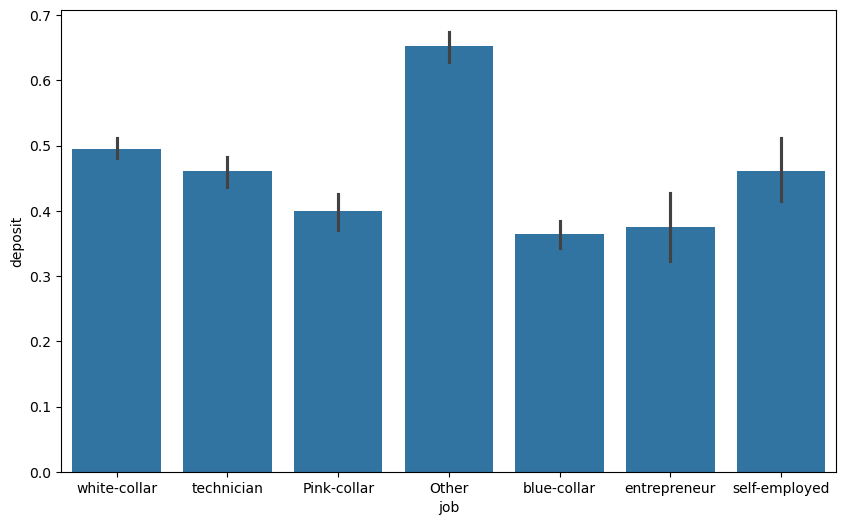

In [115]:
#bar chart of job vs deposit
plt.figure(figsize = (10,6))
sns.barplot(x = 'job', y ='deposit', data = df)


<Axes: xlabel='poutcome', ylabel='duration'>

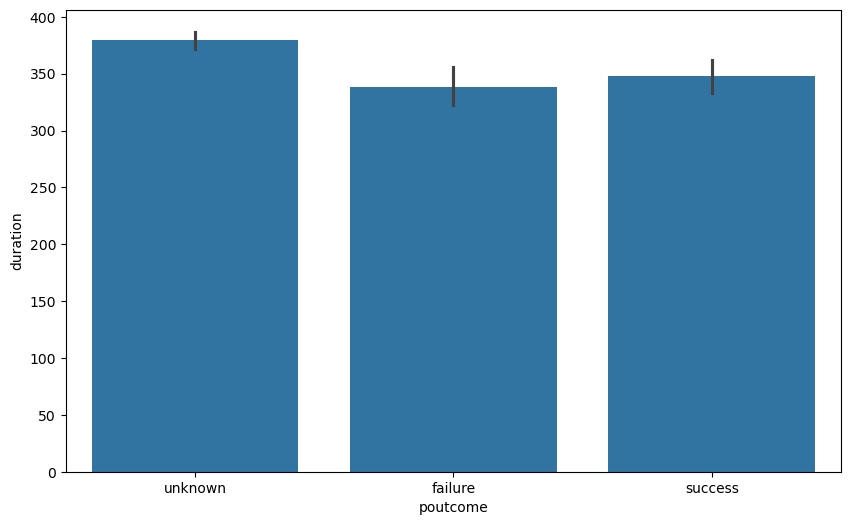

In [117]:
# bar chart of previous outcome vs call duration

plt.figure(figsize =(10,6))
sns.barplot(x = 'poutcome', y ='duration', data = df)

## * Classification

In [124]:
bankcl = df_with_dummies

In [126]:
#the correlation matrix
corr  = bankcl.corr()
corr

,age,default,balance,housing,loan,duration,campaign,previous,deposit,recent_pdays,...,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,poutcome_failure,poutcome_success,poutcome_unknown
age,1.000000,-0.011425,0.112300,-0.168700,-0.031418,0.000189,-0.005278,0.020169,0.034901,0.019102,...,0.186349,0.318436,-0.467799,0.231150,-0.094400,-0.101372,0.077761,-0.008071,0.062114,-0.038992
default,-0.011425,1.000000,-0.060954,0.011076,0.076434,-0.009760,0.030975,-0.035273,-0.040680,-0.011290,...,0.019633,-0.006819,-0.006255,0.013858,-0.000618,-0.011768,0.005421,-0.024650,-0.040272,0.048403
balance,0.112300,-0.060954,1.000000,-0.077092,-0.084589,0.022436,-0.013894,0.030805,0.081129,-0.004379,...,-0.017586,0.025431,-0.014994,-0.000673,-0.070609,0.069128,0.014596,0.001695,0.045603,-0.034524
housing,-0.168700,0.011076,-0.077092,1.000000,0.076761,0.035051,0.006660,-0.000840,-0.203888,-0.029350,...,0.007430,0.036305,-0.043817,0.017002,0.118514,-0.114955,-0.053191,0.087741,-0.136299,0.031375
loan,-0.031418,0.076434,-0.084589,0.076761,1.000000,-0.001914,0.034722,-0.022668,-0.110580,-0.012697,...,0.026463,0.044148,-0.065288,0.006854,0.079583,-0.067513,-0.050249,0.006264,-0.080370,0.053686
duration,0.000189,-0.009760,0.022436,0.035051,-0.001914,1.000000,-0.041557,-0.026716,0.451919,-0.014868,...,0.021364,-0.036179,0.023847,0.013405,0.003820,-0.006813,-0.015887,-0.033966,-0.022578,0.042725
campaign,-0.005278,0.030975,-0.013894,0.006660,0.034722,-0.041557,1.000000,-0.049699,-0.128081,-0.026296,...,-0.006828,0.047722,-0.046165,0.019915,-0.013834,-0.005427,0.012976,-0.080188,-0.091807,0.128907
previous,0.020169,-0.035273,0.030805,-0.000840,-0.022668,-0.026716,-0.049699,1.000000,0.139867,0.122076,...,-0.026566,-0.005176,0.023817,-0.024852,-0.004620,0.028146,-0.011898,0.335870,0.325477,-0.496921
deposit,0.034901,-0.040680,0.081129,-0.203888,-0.110580,0.451919,-0.128081,0.139867,1.000000,0.034457,...,0.005228,-0.092157,0.094632,-0.063002,-0.051952,0.094598,0.014355,0.020714,0.286642,-0.224785
recent_pdays,0.019102,-0.011290,-0.004379,-0.029350,-0.012697,-0.014868,-0.026296,0.122076,0.034457,1.000000,...,-0.020253,0.009583,0.003736,-0.007034,-0.017129,0.017346,0.013590,0.051422,0.119598,-0.126890


Text(0.5, 1.0, 'Heatmap of Correlation Matrix')

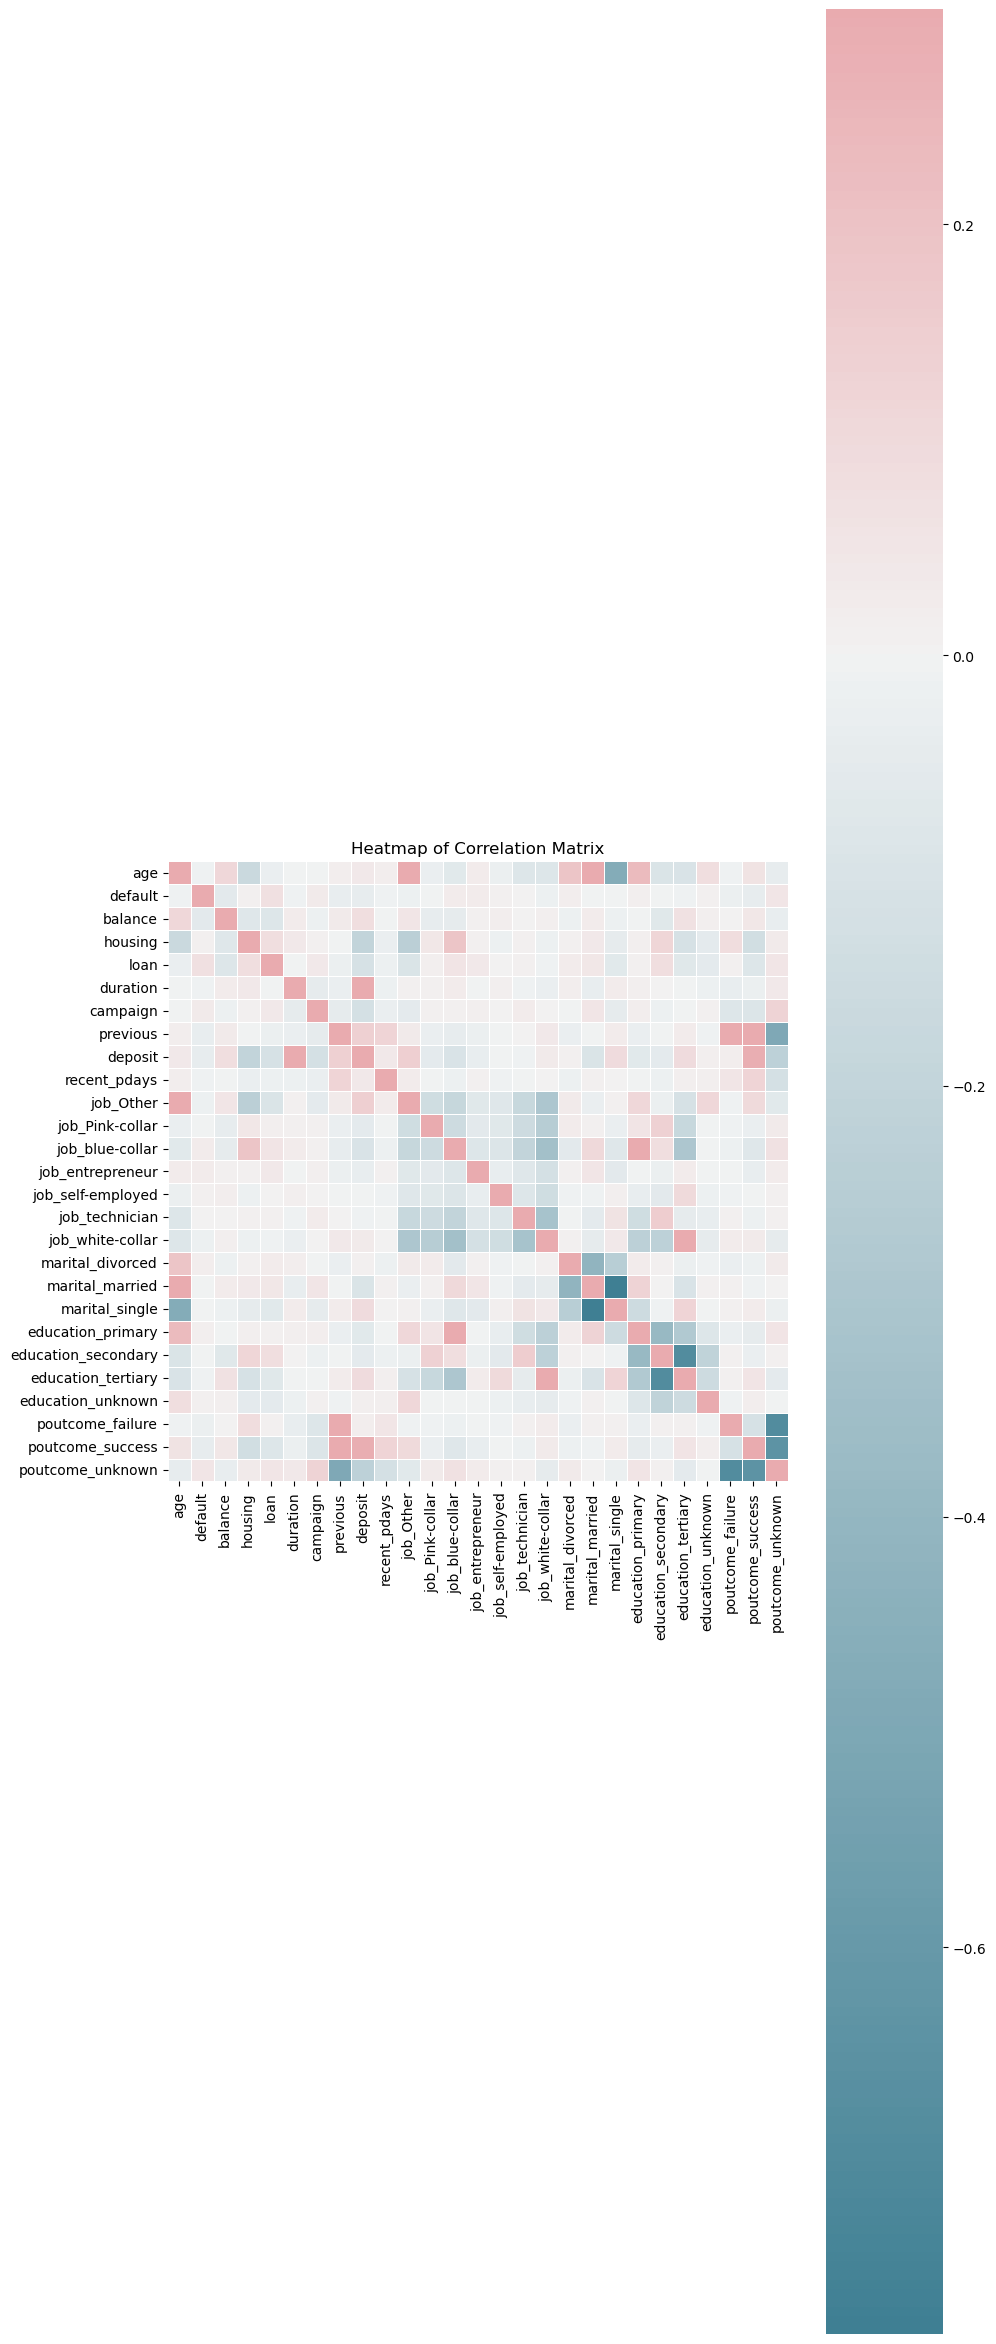

In [128]:
#heatmap
plt.figure(figsize = (10,10))
cmap = sns.diverging_palette(220,10, as_cmap = True)
sns.heatmap(corr, xticklabels = corr.columns.values, yticklabels = corr.columns.values, cmap = cmap,
           vmax = .3, center = 0, square = True, linewidths = 0.5, cbar_kws = {'shrink' : 82})
plt.title('Heatmap of Correlation Matrix')

In [130]:
#extract the deposit column
corr_deposite = pd.DataFrame(corr['deposit'].drop('deposit'))
corr_deposite.sort_values(by = 'deposit', ascending = False)

,deposit
duration,0.451919
poutcome_success,0.286642
job_Other,0.144408
previous,0.139867
marital_single,0.094632
education_tertiary,0.094598
balance,0.081129
age,0.034901
recent_pdays,0.034457
job_white-collar,0.031621


## Model building

In [ ]:
X = df_with_dummies.drop('deposit', axis = 1)
y = df_with_dummies['deposit']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 3)
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth = 2)
model.fit(X_train, y_train)
DecisionTreeClassifier(max_depth=2)
y_pred = model.predict(X_test)
#accuracy
from sklearn.metrics import accuracy_score

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 3)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model = DecisionTreeClassifier(max_depth = 2)
model.fit(X_train, y_train)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
#accuracy
from sklearn.metrics import accuracy_score